To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 2 - Transfer learning: Shallow learning vs Finetuning, Pytorch

## 2.1

### 2.1 (a)

/home/klb9313/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/klb9313/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the va

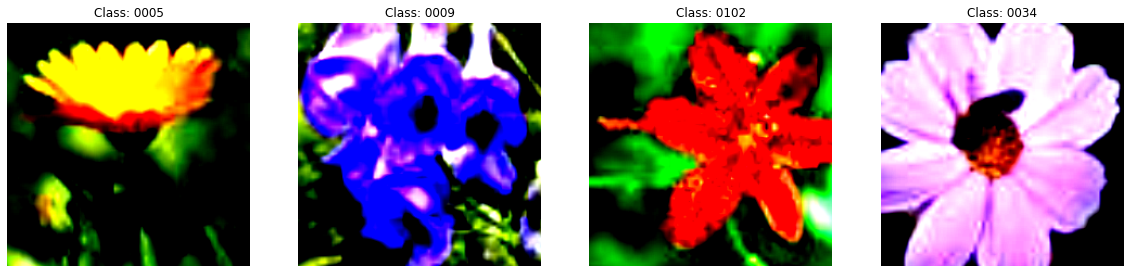

In [ ]:
import tarfile
import os
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# load flowers file path
path = 'vgg-flowers'

# Define the transformations for the images.
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the dataset from folder
dataset = datasets.ImageFolder(root=path, transform=transform)

# Load the training data from folder
train_data = datasets.ImageFolder(root='vgg-flowers/train', transform=transform)

# Load the validation data from folder
val_data = datasets.ImageFolder(root='vgg-flowers/val', transform=transform)

# Create a DataLoader to handle the dataset
data_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True)
# Create a DataLoader for validation
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)

# Load a pre-trained ResNet50 model and modify the last fully connected layer
model = torchvision.models.resnet50(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, len(train_data.classes))

# Extract and display 4 sample images from 2 different classes
def show_sample_images(data_loader, class_names):
    images, labels = next(iter(data_loader))
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    for i, (image, label) in enumerate(zip(images, labels)):
        axs[i].imshow(image.permute(1, 2, 0).numpy())
        axs[i].axis('off')
        axs[i].set_title(f'Class: {class_names[label]}')
    plt.show()

# Call the function to display the images
show_sample_images(data_loader, train_data.classes)


In [ ]:
num_classes_val = len(val_data.classes)
class_names_val = val_data.classes

# Count the number of images per class
class_counts_val = Counter([label for _, label in val_data.samples])

# Create a DataFrame for class distribution
val_class_distribution_df = pd.DataFrame.from_dict(class_counts_val, orient='index', columns=['Image Count'])
val_class_distribution_df.index = [class_names_val[i] for i in val_class_distribution_df.index]
val_class_distribution_df.sort_index(inplace=True)

# Describe dataset features
print(f"Total number of classes in validation data: {num_classes_val}")
print(f"Val Class names: {class_names_val}")
print("Val Class distribution:")
print(val_class_distribution_df)
print("\nSummary statistics of the distribution of images per class:")
print(val_class_distribution_df.describe())

Total number of classes in validation data: 102
Val Class names: ['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024', '0025', '0026', '0027', '0028', '0029', '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0037', '0038', '0039', '0040', '0041', '0042', '0043', '0044', '0045', '0046', '0047', '0048', '0049', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057', '0058', '0059', '0060', '0061', '0062', '0063', '0064', '0065', '0066', '0067', '0068', '0069', '0070', '0071', '0072', '0073', '0074', '0075', '0076', '0077', '0078', '0079', '0080', '0081', '0082', '0083', '0084', '0085', '0086', '0087', '0088', '0089', '0090', '0091', '0092', '0093', '0094', '0095', '0096', '0097', '0098', '0099', '0100', '0101', '0102']
Val Class distribution:
      Image Count
0001           10
0002           10
0003           10
0004           10
0005

In [ ]:
# Get number of classes and class names
num_classes_train = len(train_data.classes)
class_names_train = train_data.classes

# Count the number of images per class
class_counts_train = Counter([label for _, label in train_data.samples])

# Create a DataFrame for class distribution
train_class_distribution_df = pd.DataFrame.from_dict(class_counts_train, orient='index', columns=['Image Count'])
train_class_distribution_df.index = [class_names_train[i] for i in train_class_distribution_df.index]
train_class_distribution_df.sort_index(inplace=True)

# Describe dataset features
print(f"Total number of classes in training data: {num_classes_train}")
print(f"Training Class names: {class_names_train}")
print("Training Class distribution:")
print(train_class_distribution_df)
print("\nSummary statistics of the distribution of images per class:")
print(train_class_distribution_df.describe())


Total number of classes in training data: 102
Training Class names: ['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024', '0025', '0026', '0027', '0028', '0029', '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0037', '0038', '0039', '0040', '0041', '0042', '0043', '0044', '0045', '0046', '0047', '0048', '0049', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057', '0058', '0059', '0060', '0061', '0062', '0063', '0064', '0065', '0066', '0067', '0068', '0069', '0070', '0071', '0072', '0073', '0074', '0075', '0076', '0077', '0078', '0079', '0080', '0081', '0082', '0083', '0084', '0085', '0086', '0087', '0088', '0089', '0090', '0091', '0092', '0093', '0094', '0095', '0096', '0097', '0098', '0099', '0100', '0101', '0102']
Training Class distribution:
      Image Count
0001           10
0002           10
0003           10
0004          

**Answer:**
Both the training and validation data are equally dsitrubuted. They have exactly ten images accross the 102 classes. With a STD of 0.


### 2.1 (b)

In [ ]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn.functional as F
from torch.utils.data import DataLoader
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Setting up the device for GPU usage if available
compute_device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(compute_device)

# Loss function setup
loss_function = torch.nn.CrossEntropyLoss()

# Optimizer configuration
sgd_optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Learning rate scheduler setup
lr_adjuster = lr_scheduler.MultiStepLR(sgd_optimizer, milestones=[15, 30, 45], gamma=0.1)

# Preparing the data loaders
batch_size = 64
training_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)

# Metrics storage
train_accuracy_list = []
validation_accuracy_list = []
training_loss_list = []
validation_loss_list = []

# The number of training epochs
num_epochs = 60

# Training and Validation loops
for epoch_idx in range(num_epochs):
    # Training phase
    model.train()

    total_train_loss = 0
    total_train_correct = 0

    for batch_data, batch_labels in training_loader:
        batch_data, batch_labels = batch_data.to(compute_device), batch_labels.to(compute_device)

        # Clearing the gradients
        sgd_optimizer.zero_grad()

        # Forward pass
        train_outputs = model(batch_data)
        _, train_predictions = torch.max(train_outputs, 1)
        train_loss = loss_function(train_outputs, batch_labels)

        # Backpropagation
        train_loss.backward()
        sgd_optimizer.step()

        # Tracking training loss and accuracy
        total_train_loss += train_loss.item() * batch_data.size(0)
        total_train_correct += torch.sum(train_predictions == batch_labels.data).item()

    train_epoch_loss = total_train_loss / len(train_data)
    train_epoch_accuracy = total_train_correct / len(train_data)

    train_accuracy_list.append(train_epoch_accuracy)
    training_loss_list.append(train_epoch_loss)

    # Validation phase
    model.eval()
    total_val_loss = 0
    total_val_correct = 0

    with torch.no_grad():
        for batch_data, batch_labels in val_loader:
            batch_data, batch_labels = batch_data.to(compute_device), batch_labels.to(compute_device)

            validation_outputs = model(batch_data)
            _, validation_predictions = torch.max(validation_outputs, 1)
            validation_loss = loss_function(validation_outputs, batch_labels)

            total_val_loss += validation_loss.item() * batch_data.size(0)
            total_val_correct += torch.sum(validation_predictions == batch_labels.data).item()

    val_epoch_loss = total_val_loss / len(val_data)
    val_epoch_accuracy = total_val_correct / len(val_data)

    validation_accuracy_list.append(val_epoch_accuracy)
    validation_loss_list.append(val_epoch_loss)

    print(f'Epoch {epoch_idx+1}/{num_epochs} - Training Loss: {train_epoch_loss:.4f}, '
          f'Training Accuracy: {train_epoch_accuracy:.4f}, '
          f'Validation Loss: {val_epoch_loss:.4f}, '
          f'Validation Accuracy: {val_epoch_accuracy:.4f}')

    # Learning rate scheduling step
    lr_adjuster.step()

print('Training complete.')


Epoch 1/60 - Training Loss: 4.6717, Training Accuracy: 0.0167, Validation Loss: 4.5887, Validation Accuracy: 0.0294
Epoch 2/60 - Training Loss: 4.5021, Training Accuracy: 0.0578, Validation Loss: 4.4459, Validation Accuracy: 0.0961
Epoch 3/60 - Training Loss: 4.2902, Training Accuracy: 0.2078, Validation Loss: 4.3171, Validation Accuracy: 0.1941
Epoch 4/60 - Training Loss: 4.0688, Training Accuracy: 0.4147, Validation Loss: 4.1446, Validation Accuracy: 0.2461
Epoch 5/60 - Training Loss: 3.8096, Training Accuracy: 0.5676, Validation Loss: 3.9609, Validation Accuracy: 0.2951
Epoch 6/60 - Training Loss: 3.5544, Training Accuracy: 0.6333, Validation Loss: 3.7365, Validation Accuracy: 0.3500
Epoch 7/60 - Training Loss: 3.2794, Training Accuracy: 0.7039, Validation Loss: 3.5385, Validation Accuracy: 0.4039
Epoch 8/60 - Training Loss: 3.0147, Training Accuracy: 0.7461, Validation Loss: 3.3333, Validation Accuracy: 0.4245
Epoch 9/60 - Training Loss: 2.7539, Training Accuracy: 0.7775, Validatio

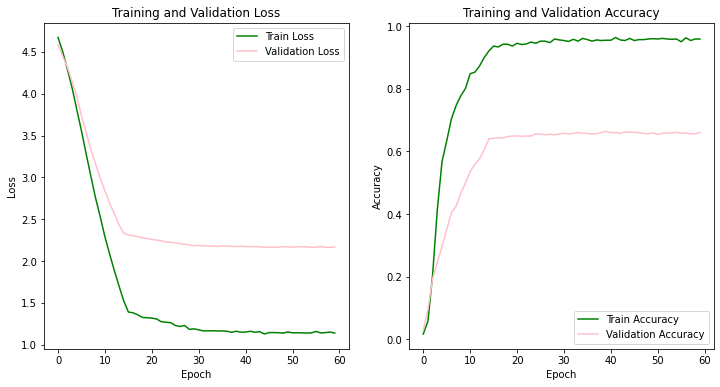

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation losses
plt.figure(figsize=(12, 6))

# First subplot for the losses
plt.subplot(1, 2, 1)
plt.plot(training_loss_list, label='Train Loss', color='green')  # Set the line color to green
plt.plot(validation_loss_list, label='Validation Loss', color='pink')  # Set the line color to pink
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Second subplot for the accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list, label='Train Accuracy', color='green')  # Set the line color to green
plt.plot(validation_accuracy_list, label='Validation Accuracy', color='pink')  # Set the line color to pink
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.show()

**Answer:**
With 60 epochs and using a strategy of gamma set to 0.1 at epochs 15,30 and 45 the first observations show a consisistent decrease in the trainign and validation losses as well as an upward trend for the same accuracies.
The training loss appears to decrease more rapidly compared to the validation loss and the training accuracy increases to almost 100%. The validation accuracy does not, instead it seems to flatten out at arounf 66% This gap may indicate that the model could be memorizing the training data instead of generalizing from it. This is usuallly an indicator of overfitting.Past the initial learnign rate drop the performance seems to indicate that there is limited model performance improvement past the 15th epoch.

### 2.1 (c)

In [ ]:
import tarfile
import os
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

def training_cycle(network, data_loaders, loss_evaluator, optim_algo, lr_scheduler, epochs=60):
    network.to(compute_device)

    # Stores for accuracy and loss data
    train_accuracy = []
    train_loss = []
    val_accuracy = []
    val_loss = []

    for epoch in range(epochs):
        network.train()  # Set network to training mode

        cumulative_loss = 0.0
        cumulative_corrects = 0

        # Iterate over data.
        for images, targets in data_loaders['train']:
            images = images.to(compute_device)
            targets = targets.to(compute_device)

            optim_algo.zero_grad()

            outputs = network(images)
            _, predictions = torch.max(outputs, 1)
            loss = loss_evaluator(outputs, targets)

            loss.backward()
            optim_algo.step()

            cumulative_loss += loss.item() * images.size(0)
            cumulative_corrects += torch.sum(predictions == targets.data)

        avg_train_loss = cumulative_loss / len(data_loaders['train'].dataset)
        avg_train_accuracy = cumulative_corrects.double() / len(data_loaders['train'].dataset)

        train_loss.append(avg_train_loss)
        train_accuracy.append(avg_train_accuracy.item())

        # Validation phase
        network.eval()  # Set model to evaluate mode
        validation_loss = 0.0
        validation_corrects = 0

        with torch.no_grad():  # Gradient updates are turned off
            for images, targets in data_loaders['validation']:
                images = images.to(compute_device)
                targets = targets.to(compute_device)

                outputs = network(images)
                _, predictions = torch.max(outputs, 1)
                loss = loss_evaluator(outputs, targets)

                validation_loss += loss.item() * images.size(0)
                validation_corrects += torch.sum(predictions == targets.data)

        avg_val_loss = validation_loss / len(data_loaders['validation'].dataset)
        avg_val_accuracy = validation_corrects.double() / len(data_loaders['validation'].dataset)

        val_loss.append(avg_val_loss)
        val_accuracy.append(avg_val_accuracy.item())

        # Print training/validation statistics
        print('Epoch: {} of {} - Training Loss: {:.4f} Acc: {:.4f} - Validation Loss: {:.4f} Acc: {:.4f}'.format(
            epoch+1, epochs, avg_train_loss, avg_train_accuracy, avg_val_loss, avg_val_accuracy))

        # Adjust learning rate based on scheduler
        lr_scheduler.step()

    print('Training cycle complete.')

    return network, train_accuracy, train_loss, val_accuracy, val_loss

In [ ]:
# Configure data loaders for training and validation
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn.functional as F
from torch.utils.data import DataLoader
num_classes = 102
data_loaders = {
    'train': torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4),
    'validation': torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)
}

# Set the loss function
loss_evaluator = torch.nn.CrossEntropyLoss()

# Duplicate the model from above instructions
network001 = torchvision.models.resnet50(pretrained=True)
network001.fc = torch.nn.Linear(network001.fc.in_features, num_classes)

# Initialize optimizer with a different learning rate of 0.01
optim_algo001 =optim.SGD(network001.parameters(), lr=0.01, momentum=0.9)
lr_scheduler001 = lr_scheduler.MultiStepLR(optim_algo001, milestones=[15, 30, 45], gamma=0.1)

# Start the training process
network001, train_accuracy001, train_loss001, val_accuracy001, val_loss001 = training_cycle(
    network001, data_loaders, loss_evaluator, optim_algo001, lr_scheduler001, epochs=60)


Epoch: 1 of 60 - Training Loss: 4.5317 Acc: 0.0480 - Validation Loss: 3.9101 Acc: 0.1765
Epoch: 2 of 60 - Training Loss: 3.0665 Acc: 0.4353 - Validation Loss: 2.5588 Acc: 0.4373
Epoch: 3 of 60 - Training Loss: 1.6287 Acc: 0.7255 - Validation Loss: 1.8188 Acc: 0.6167
Epoch: 4 of 60 - Training Loss: 0.7896 Acc: 0.8804 - Validation Loss: 1.4662 Acc: 0.6637
Epoch: 5 of 60 - Training Loss: 0.2802 Acc: 0.9784 - Validation Loss: 1.2085 Acc: 0.7245
Epoch: 6 of 60 - Training Loss: 0.0957 Acc: 1.0000 - Validation Loss: 1.0749 Acc: 0.7382
Epoch: 7 of 60 - Training Loss: 0.0422 Acc: 0.9990 - Validation Loss: 1.0212 Acc: 0.7500
Epoch: 8 of 60 - Training Loss: 0.0271 Acc: 1.0000 - Validation Loss: 0.9500 Acc: 0.7676
Epoch: 9 of 60 - Training Loss: 0.0214 Acc: 1.0000 - Validation Loss: 0.9459 Acc: 0.7637
Epoch: 10 of 60 - Training Loss: 0.0161 Acc: 1.0000 - Validation Loss: 0.9314 Acc: 0.7696
Epoch: 11 of 60 - Training Loss: 0.0144 Acc: 1.0000 - Validation Loss: 0.9225 Acc: 0.7667
Epoch: 12 of 60 - T

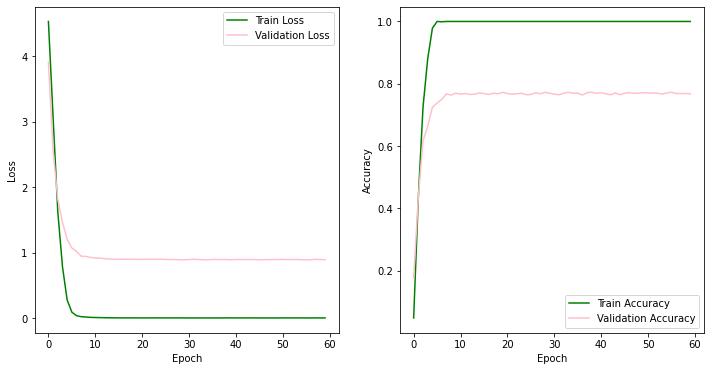

In [ ]:
# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss001, label='Train Loss', color='green')
plt.plot(val_loss001, label='Validation Loss', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracy001, label='Train Accuracy', color='green')
plt.plot(val_accuracy001, label='Validation Accuracy', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
#data loader train val
class_names = train_data.classes
dataloaders = {'train': torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4),
               'validation': torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)}

# criterion
criterion = torch.nn.CrossEntropyLoss()

# make same model from 2
model_01 = torchvision.models.resnet50(pretrained=True)
model_01.fc = torch.nn.Linear(model_01.fc.in_features, len(class_names))

# learning rate 0.1
optimizer_01 = optim.SGD(model_01.parameters(), lr=0.1, momentum=0.9)
scheduler_01 = lr_scheduler.MultiStepLR(optimizer_01, milestones=[15, 30, 45], gamma=0.1)

model_01, train_acc_01, train_loss_01, val_acc_01, val_loss_01 = training_cycle(
    model_01, dataloaders, criterion, optimizer_01, scheduler_01, epochs=60)

Epoch: 1 of 60 - Training Loss: 4.7424 Acc: 0.0696 - Validation Loss: 3930.1227 Acc: 0.0098
Epoch: 2 of 60 - Training Loss: 4.7851 Acc: 0.0402 - Validation Loss: 413518.5211 Acc: 0.0098
Epoch: 3 of 60 - Training Loss: 4.3145 Acc: 0.0441 - Validation Loss: 754.7413 Acc: 0.0098
Epoch: 4 of 60 - Training Loss: 3.7653 Acc: 0.0892 - Validation Loss: 6.1635 Acc: 0.0608
Epoch: 5 of 60 - Training Loss: 3.4759 Acc: 0.1275 - Validation Loss: 3.9400 Acc: 0.1284
Epoch: 6 of 60 - Training Loss: 3.2985 Acc: 0.1686 - Validation Loss: 3.7924 Acc: 0.1598
Epoch: 7 of 60 - Training Loss: 3.0919 Acc: 0.2137 - Validation Loss: 3.4637 Acc: 0.1765
Epoch: 8 of 60 - Training Loss: 2.8505 Acc: 0.2471 - Validation Loss: 3.7520 Acc: 0.1578
Epoch: 9 of 60 - Training Loss: 2.7366 Acc: 0.2824 - Validation Loss: 4.0446 Acc: 0.1471
Epoch: 10 of 60 - Training Loss: 2.5114 Acc: 0.3167 - Validation Loss: 3.3145 Acc: 0.2608
Epoch: 11 of 60 - Training Loss: 2.4013 Acc: 0.3265 - Validation Loss: 4.0377 Acc: 0.2069
Epoch: 12

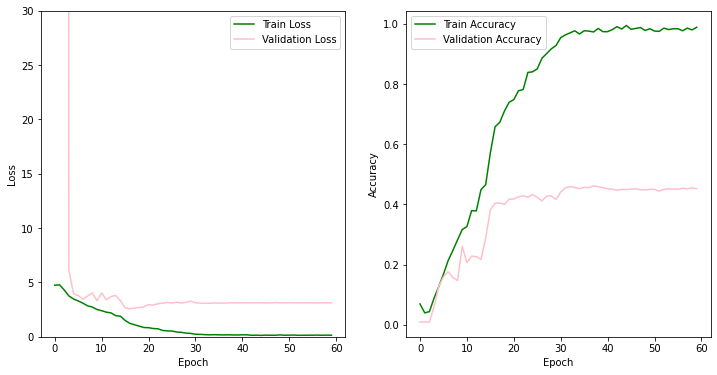

In [ ]:
# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss_01, label='Train Loss', color='green')
plt.plot(val_loss_01, label='Validation Loss', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,30)
plt.legend()

# Plot training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_acc_01, label='Train Accuracy', color='green')
plt.plot(val_acc_01, label='Validation Accuracy', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Answer:**

With a learning rate of 0.01 the training loss decreases sharply then platous which indicates the model is learning the data and then stabilizing. The validation looks similar to the training loss which is  a good sign the model is not overfitting. The training accuracy increases sharply and then steadies which is a good indicator that it is learning the training data well.The validation accuracy incrceases at a slower pace to that of the training accuracy, but it doesnt flatten our or decrease which indicates it is generalizing well on unseen data.
Note: I had to make the loss go up to 30 to be able to accurately see that the training loss does not go to zero and identify the patterns in validation loss.


With a learning rate of 0.1 the training loss decreases very sharply, steeper than with 0.01 learning rate. The validation loss decreases but doesnt go as low as teh lower learning rate there is more flucuation, which could be a sign of poor model stability. The training accuracy increases rapidly and reaches a high level but the validation accuracy does not go as high, it is much lower which is a sign that the model is overfititng and not performaing as well on the validation data as the learning rate of 0.01.

Overall best model: The model with a learning rate of 0.01 has a good balance between covergence speed and stability. It has the highest validation accuracy at 76.76%.
The learning rate of 0.1 is overfititng and the learning date of 0.001 creates a model with good generalization but not the highest possible accuracy (the 0.01 model was about 10% higher)




## 2.2

### 2.2 (a)

In [ ]:
#  finetuning the model's final layer
def adjust_and_train_model(custom_model, data_loaders, loss_fn, opt, lr_scheduler, epochs=60):
    custom_model.to(compute_device)

    # Lists to store performance metrics for training and validation phases
    metrics_train_acc = []
    metrics_train_loss = []
    metrics_val_acc = []
    metrics_val_loss = []

    # training process
    for ep in range(epochs):
        custom_model.train()  # Set model to training mode

        total_loss = 0.0
        total_correct = 0

        # Iterate over the training data
        for batch_data, batch_labels in data_loaders['train']:
            batch_data = batch_data.to(compute_device)
            batch_labels = batch_labels.to(compute_device)

            opt.zero_grad()

            # Disable gradient calculations for all layers except the final fully connected layer
            for param in custom_model.parameters():
                param.requires_grad = False
            for param in custom_model.fc.parameters():
                param.requires_grad = True

            # Forward pass
            predictions = custom_model(batch_data)
            _, predicted_labels = torch.max(predictions, 1)
            loss = loss_fn(predictions, batch_labels)

            # Backward pass and optimization
            loss.backward()
            opt.step()

            total_loss += loss.item() * batch_data.size(0)
            total_correct += torch.sum(predicted_labels == batch_labels.data)

        # Compute average loss and accuracy for the epoch
        average_loss = total_loss / len(data_loaders['train'].dataset)
        average_accuracy = total_correct.double() / len(data_loaders['train'].dataset)

        # Record the metrics
        metrics_train_loss.append(average_loss)
        metrics_train_acc.append(average_accuracy.item())

        print(f'Epoch {ep + 1}/{epochs} - Train Loss: {average_loss:.4f}, Train Accuracy: {average_accuracy:.4f}')

        # Switch to evaluation mode for validation
        custom_model.eval()
        validation_loss = 0.0
        validation_corrects = 0

        # Validation phase without gradient calculation
        with torch.no_grad():
            for batch_data, batch_labels in data_loaders['validation']:
                batch_data = batch_data.to(compute_device)
                batch_labels = batch_labels.to(compute_device)

                predictions = custom_model(batch_data)
                _, predicted_labels = torch.max(predictions, 1)
                loss = loss_fn(predictions, batch_labels)

                validation_loss += loss.item() * batch_data.size(0)
                validation_corrects += torch.sum(predicted_labels == batch_labels.data)

        # Calculate and record validation loss and accuracy
        avg_val_loss = validation_loss / len(data_loaders['validation'].dataset)
        avg_val_accuracy = validation_corrects.double() / len(data_loaders['validation'].dataset)
        metrics_val_loss.append(avg_val_loss)
        metrics_val_acc.append(avg_val_accuracy.item())

        print(f'Epoch {ep + 1}/{epochs} - Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_accuracy:.4f}')

        # Adjust learning rate based on the scheduler
        lr_scheduler.step()

    print('Training complete')

    return metrics_train_acc, metrics_train_loss, metrics_val_acc, metrics_val_loss


In [ ]:
import copy  # Used for duplicating the model for separate learning rate trials
from torch.optim import lr_scheduler
# Set up the initial pre-trained model to tune the last layer
base_model = torchvision.models.resnet50(pretrained=True)
base_model.fc = torch.nn.Linear(base_model.fc.in_features, len(class_names))

# Establish the data loaders for the training and validation sets
data_loaders = {
    'train': torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4),
    'validation': torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)
}

# Initialize the loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Prepare a series of learning rates for experimentation
lrs = [1.0, 0.1, 0.01, 0.001]

# Dictionary to store the training outcomes for each learning rate
lr_results = {}

# Loop to train the model's last layer with various learning rates
for learning_rate in lrs:
    # Copy the baseline model to ensure the same starting point
    custom_model = copy.deepcopy(base_model)

    # Set up the optimizer and learning rate scheduler as before
    opt = optim.SGD(custom_model.parameters(), lr=learning_rate, momentum=0.9)
    lrscheduler = lr_scheduler.MultiStepLR(opt, milestones=[15, 30, 45], gamma=0.1)

    print(f"Commencing training with learning rate: {learning_rate}")  # Display progress
    metrics_train_acc, metrics_train_loss, metrics_val_acc, metrics_val_loss = adjust_and_train_model(
        custom_model, data_loaders, loss_fn, opt, lrscheduler, epochs=60)

    # Archive the performance metrics for later analysis
    lr_results[learning_rate] = {
        'train_accuracy': metrics_train_acc,
        'train_loss': metrics_train_loss,
        'validation_accuracy': metrics_val_acc,
        'validation_loss': metrics_val_loss
    }


Commencing training with learning rate: 1.0
Epoch 1/60 - Train Loss: 103.6739, Train Accuracy: 0.0500
Epoch 1/60 - Val Loss: 269.2397, Val Accuracy: 0.1824
Epoch 2/60 - Train Loss: 324.0767, Train Accuracy: 0.2500
Epoch 2/60 - Val Loss: 295.3357, Val Accuracy: 0.2500
Epoch 3/60 - Train Loss: 215.0003, Train Accuracy: 0.3696
Epoch 3/60 - Val Loss: 172.5136, Val Accuracy: 0.3039
Epoch 4/60 - Train Loss: 93.1731, Train Accuracy: 0.5343
Epoch 4/60 - Val Loss: 63.7058, Val Accuracy: 0.3745
Epoch 5/60 - Train Loss: 33.0722, Train Accuracy: 0.6716
Epoch 5/60 - Val Loss: 46.8928, Val Accuracy: 0.4314
Epoch 6/60 - Train Loss: 14.1757, Train Accuracy: 0.7853
Epoch 6/60 - Val Loss: 34.3643, Val Accuracy: 0.4598
Epoch 7/60 - Train Loss: 6.0684, Train Accuracy: 0.8490
Epoch 7/60 - Val Loss: 30.5505, Val Accuracy: 0.4353
Epoch 8/60 - Train Loss: 2.5641, Train Accuracy: 0.9039
Epoch 8/60 - Val Loss: 23.5825, Val Accuracy: 0.5255
Epoch 9/60 - Train Loss: 1.7133, Train Accuracy: 0.9333
Epoch 9/60 - Val

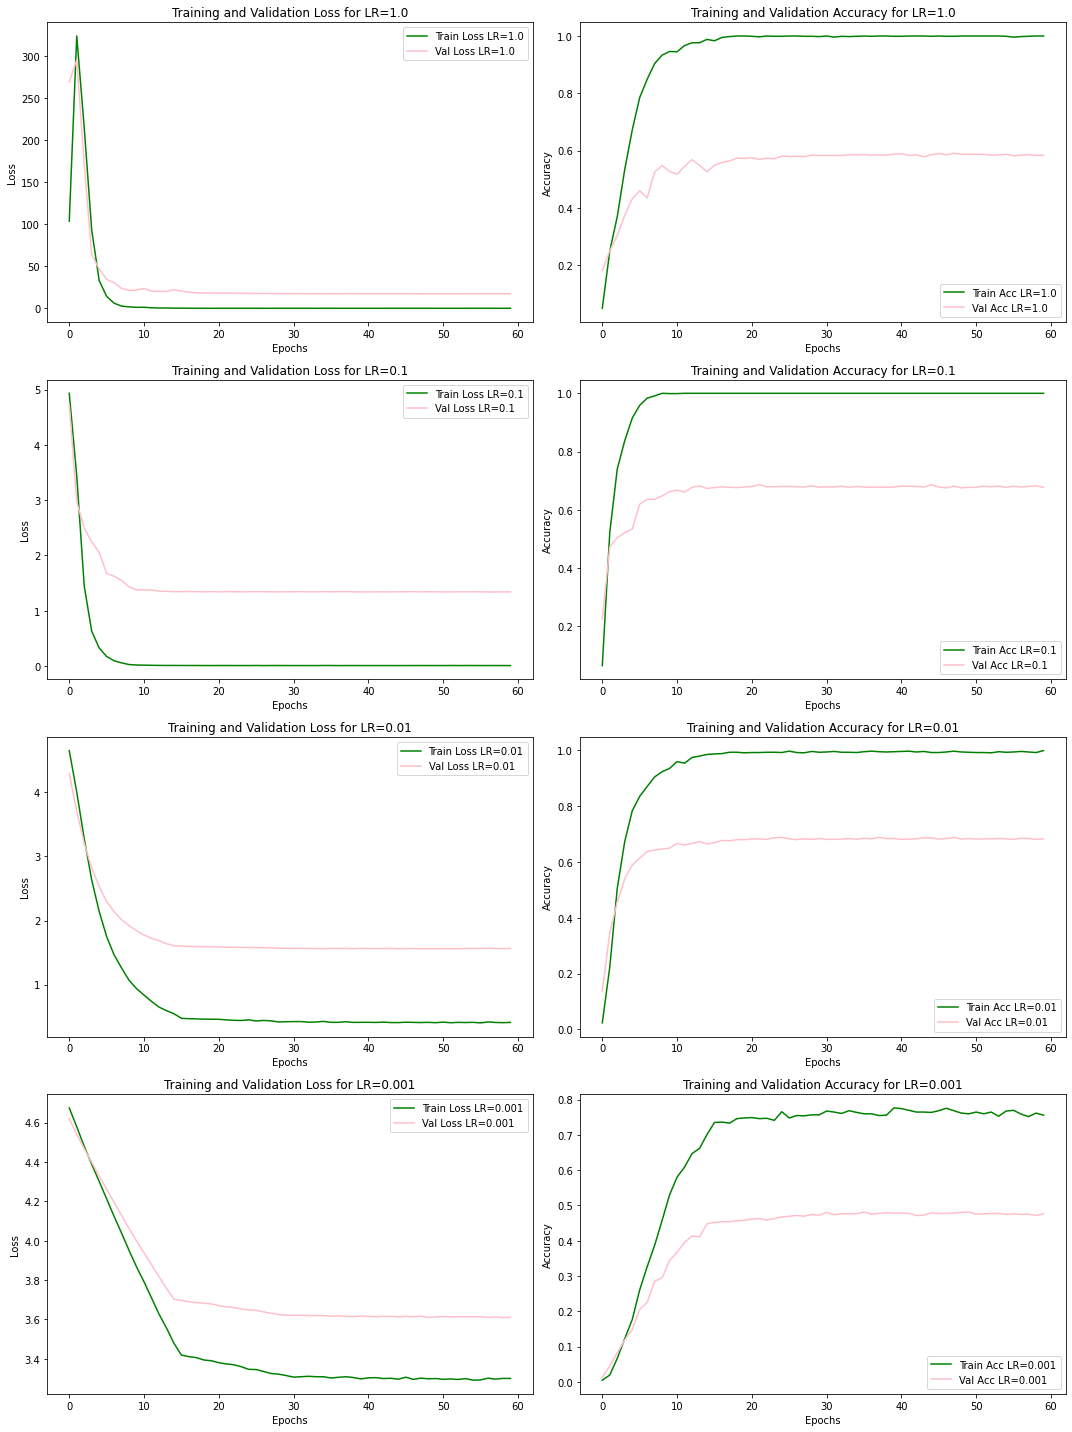

In [ ]:
import matplotlib.pyplot as plt

# Assuming lr_results is the dictionary that you've populated with your training results
# Figure with 4 rows (for each learning rate) and 2 columns (for loss and accuracy)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Go through each learning rate and its corresponding data
for i, (lr, data) in enumerate(lr_results.items()):
    # Plot train and validation loss on the left column (i, 0)
    axes[i, 0].plot(data['train_loss'], label=f'Train Loss LR={lr}', color = 'green')
    axes[i, 0].plot(data['validation_loss'], label=f'Val Loss LR={lr}', color ='pink')
    axes[i, 0].set_title(f'Training and Validation Loss for LR={lr}')
    axes[i, 0].set_xlabel('Epochs')
    axes[i, 0].set_ylabel('Loss')
    axes[i, 0].legend()

    # Plot train and validation accuracy on the right column (i, 1)
    axes[i, 1].plot(data['train_accuracy'], label=f'Train Acc LR={lr}', color = 'green')
    axes[i, 1].plot(data['validation_accuracy'], label=f'Val Acc LR={lr}', color ='pink')
    axes[i, 1].set_title(f'Training and Validation Accuracy for LR={lr}')
    axes[i, 1].set_xlabel('Epochs')
    axes[i, 1].set_ylabel('Accuracy')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


**Answer:**
The models with a learning rate of 0.1 and 0.01, have the highest validation accuracy at 67% and 68% respectively. The 0.01 model has a very slightly higher accuracy but also a 0.02 more validation loss than the 0.1 model.


### 2.2 (b)

In [ ]:
# Summarized model results for each learning rate
for lr in [1.0, 0.1, 0.01, 0.001]:
    print(
        f"Learning Rate: {lr}\n"
        f"\tFinal Train Loss: {lr_results[lr]['train_loss'][-1]:.4f}\n"
        f"\tFinal Train Accuracy: {lr_results[lr]['train_accuracy'][-1]:.4f}\n"
        f"\tFinal Validation Loss: {lr_results[lr]['validation_loss'][-1]:.4f}\n"
        f"\tFinal Validation Accuracy: {lr_results[lr]['validation_accuracy'][-1]:.4f}\n"
    )


Learning Rate: 1.0
	Final Train Loss: 0.0000
	Final Train Accuracy: 1.0000
	Final Validation Loss: 17.2259
	Final Validation Accuracy: 0.5843

Learning Rate: 0.1
	Final Train Loss: 0.0078
	Final Train Accuracy: 1.0000
	Final Validation Loss: 1.3405
	Final Validation Accuracy: 0.6775

Learning Rate: 0.01
	Final Train Loss: 0.4110
	Final Train Accuracy: 0.9980
	Final Validation Loss: 1.5653
	Final Validation Accuracy: 0.6824

Learning Rate: 0.001
	Final Train Loss: 3.3003
	Final Train Accuracy: 0.7559
	Final Validation Loss: 3.6104
	Final Validation Accuracy: 0.4765



In [ ]:
# Dictionary to hold the model data for different learning rates
model_data = {
    0.001: {
        'train_loss': training_loss_list,
        'train_accuracy': train_accuracy_list,
        'val_loss': validation_loss_list,
        'val_accuracy': validation_accuracy_list
    },
    0.01: {
        'train_loss': train_loss001,
        'train_accuracy': train_accuracy001,
        'val_loss': val_loss001,
        'val_accuracy': val_accuracy001
    },
    0.1: {
        'train_loss': train_loss_01,
        'train_accuracy': train_acc_01,
        'val_loss': val_loss_01,
        'val_accuracy': val_acc_01
    }
}


for lr, data in model_data.items():
    print(
        f"Initial Learning Rate: {lr}\n"
        f"\tFinal Train Loss: {data['train_loss'][-1]:.4f}\n"
        f"\tFinal Train Accuracy: {data['train_accuracy'][-1]:.4f}\n"
        f"\tFinal Validation Loss: {data['val_loss'][-1]:.4f}\n"
        f"\tFinal Validation Accuracy: {data['val_accuracy'][-1]:.4f}\n"
    )


Initial Learning Rate: 0.001
	Final Train Loss: 1.1401
	Final Train Accuracy: 0.9588
	Final Validation Loss: 2.1685
	Final Validation Accuracy: 0.6608

Initial Learning Rate: 0.01
	Final Train Loss: 0.0081
	Final Train Accuracy: 1.0000
	Final Validation Loss: 0.8975
	Final Validation Accuracy: 0.7676

Initial Learning Rate: 0.1
	Final Train Loss: 0.1442
	Final Train Accuracy: 0.9882
	Final Validation Loss: 3.1239
	Final Validation Accuracy: 0.4520



**Answer:**
The overall best model here is with fine tuning for the whole network and a learning rate of 0.01. It has a validation accuracy of 76.76% and a validation loss of 0.8975.

With only the final layer trained at a learning rate of 0.01 there was a val accuracy of 68.24% and a validation loss of 1.563.

These two were very similar but the whole model fine tuned was slightly better.  This therefore indicates that allowing the entire network to adjust weights allows the model to generalize slightly better.
In this case the learning rate was also ideal, not over fitting or under fitting.

A reasonable explanation for this was that the rate is small enough to not cause large changes to the pretrained rates which may have damaged transfered knowdedge between source tasks,but it was big enough to allow comprehensive learning and adaption with the new data. This perfomance shows that this leanrinf rate is ideal and helped the model when trainign and execcuting on other datasets to be able to keep the important features already lerned and also adjust for new patterns in the target data.

In addition, it may be a good rate to help ensure that gradient updates are the perfect size to avoud saddle points or local minima that. RTgis rate may also just be the best to work with the other hyper parameters like batch size.

